# Decouverte de l'environnement

In [15]:
from env_traffic import TrafficEnvironment
import matplotlib.pyplot as plt

In [17]:
env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0 # Garder le feu qu'il est
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Recompense : {reward}")

Etat : [3 2 7 6], Recompense : 7
Etat : [1 0 9 6], Recompense : 4
Etat : [0 1 9 7], Recompense : 1
Etat : [ 2  2 11  8], Recompense : 1
Etat : [ 2  2 12  9], Recompense : 3
Etat : [ 1  1 12 11], Recompense : 4
Etat : [ 2  0 14 11], Recompense : 2
Etat : [ 2  2 16 11], Recompense : 2
Etat : [ 0  1 18 12], Recompense : 3
Etat : [ 2  0 20 14], Recompense : 1


# Implementation de Q-learning 

In [22]:
import numpy as np
q_table = np.zeros((10, 10, 10, 10, 2))

print(q_table)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

Épisode 0,Reward: 161
Épisode 100,Reward: 156
Épisode 200,Reward: 161
Épisode 300,Reward: 155
Épisode 400,Reward: 166
Épisode 500,Reward: 160
Épisode 600,Reward: 157
Épisode 700,Reward: 155
Épisode 800,Reward: 154
Épisode 900,Reward: 164
🚦 Entraînement terminé !


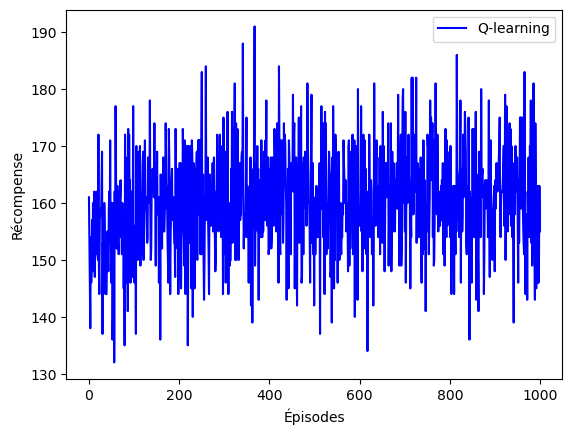

Q-table après entraînement:
[[[[[1.83551827e+01 7.40186729e+00]
    [1.05799665e+01 1.96623292e+01]
    [1.87638406e+01 1.28897518e+01]
    ...
    [2.70000000e-02 4.14836800e+00]
    [0.00000000e+00 2.95901870e+00]
    [2.78100000e-02 0.00000000e+00]]

   [[9.23286889e+00 1.94969472e+01]
    [1.04710015e+01 2.03562173e+01]
    [1.48991959e+01 2.15655326e+01]
    ...
    [2.85992409e+00 0.00000000e+00]
    [2.67760034e-01 5.85023523e+00]
    [1.97190549e+00 5.71458029e-01]]

   [[1.90013825e+01 1.27281881e+01]
    [1.45686219e+01 2.10159794e+01]
    [1.71993095e+01 2.21572812e+01]
    ...
    [7.06780687e+00 0.00000000e+00]
    [5.15796879e+00 1.45833532e+00]
    [2.22603500e+00 1.12527111e+01]]

   ...

   [[4.34160887e-01 4.80798608e+00]
    [2.98999361e+00 1.02194172e+01]
    [6.68794591e-01 1.10953024e+01]
    ...
    [5.73523020e+00 1.78304528e+00]
    [5.43849464e+00 2.35124698e+00]
    [4.39591311e+00 1.37894619e+01]]

   [[1.06719584e+00 0.00000000e+00]
    [0.00000000e+00 4.70

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):  
    q_learning_rewards = []  # ✅ Store total reward per episode

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0  # ✅ Track total reward for this episode

        for step in range(50):  
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))
            total_reward += reward  # ✅ Accumulate reward

            # Update Q-table using Bellman equation
            best_next_action = np.argmax(q_table[next_state])  
            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

            state = next_state  

        q_learning_rewards.append(total_reward)  # ✅ Store episode reward
        epsilon = max(0.01, epsilon * decay)  # Decay epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode},Reward: {total_reward}")

    print("🚦 Entraînement terminé !")
    return q_table, q_learning_rewards  

# Train the model
env = TrafficEnvironment()
q_table, q_learning_rewards = train_q_learning(env, episodes=1000)

# Plot the learning curve
plt.plot(q_learning_rewards, label="Q-learning", color='b')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table après entraînement:")
print(q_table)

# Implementation de SARSA

Épisode 0, Reward: 146
Épisode 100, Reward: 155
Épisode 200, Reward: 166
Épisode 300, Reward: 165
Épisode 400, Reward: 157
Épisode 500, Reward: 156
Épisode 600, Reward: 157
Épisode 700, Reward: 173
Épisode 800, Reward: 184
Épisode 900, Reward: 145
🚦 Entraînement terminé (SARSA) !


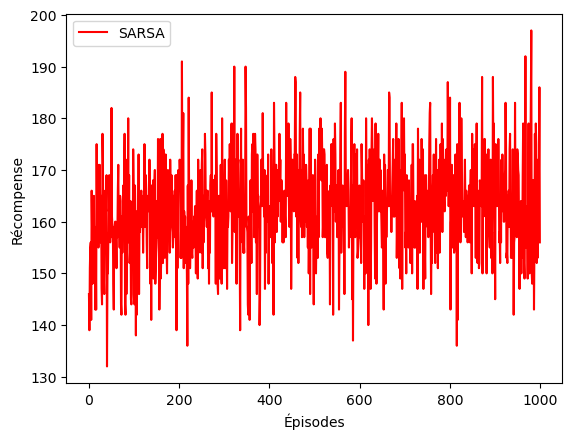

Q-table après entraînement:
[[[[[2.12991763e+01 1.01584222e+01]
    [1.56284274e+01 2.16049795e+01]
    [2.11875879e+01 1.64855779e+01]
    ...
    [2.70000000e-02 1.01527905e+01]
    [0.00000000e+00 2.95901870e+00]
    [1.88154851e+00 0.00000000e+00]]

   [[1.27603308e+01 2.17102669e+01]
    [1.73386175e+01 2.27736480e+01]
    [1.92219237e+01 2.27573653e+01]
    ...
    [5.94271526e+00 0.00000000e+00]
    [2.92415253e-01 1.00060484e+01]
    [3.67777726e+00 8.87111567e-01]]

   [[2.13531512e+01 1.79377643e+01]
    [1.75659497e+01 2.30094624e+01]
    [2.01611157e+01 2.44972849e+01]
    ...
    [9.88119421e+00 6.30415181e+00]
    [8.70380270e+00 1.45833532e+00]
    [2.22603500e+00 1.55556744e+01]]

   ...

   [[4.34160887e-01 4.59934868e+00]
    [2.74370570e+00 1.54305721e+01]
    [2.03152334e+00 1.47194223e+01]
    ...
    [6.72199417e+00 1.78304528e+00]
    [6.17530632e+00 2.35124698e+00]
    [5.69179212e+00 1.82357535e+01]]

   [[1.06719584e+00 0.00000000e+00]
    [0.00000000e+00 7.58

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    sarsa_rewards = []  

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))  
        
        
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  
        else:
            action = np.argmax(q_table[state])  

        total_reward = 0

        for step in range(50):  # Limit max steps per episode
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))  
            total_reward += reward  # ✅ Accumulate reward

            # Choose next action using ε-greedy policy
            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])  # Explore
            else:
                next_action = np.argmax(q_table[next_state])  # Exploit

            # SARSA Update Rule: Q(s, a) ← Q(s, a) + α [R + γ Q(s', a') - Q(s, a)]
            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (next_action,)] - q_table[state + (action,)])

            # Update state and action
            state, action = next_state, next_action  

        sarsa_rewards.append(total_reward)  # ✅ Store episode reward
        epsilon = max(0.01, epsilon * decay)  # Decay epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode}, Reward: {total_reward}")

    print("🚦 Entraînement terminé (SARSA) !")
    return q_table, sarsa_rewards  # ✅ Return both Q-table and rewards

# ✅ Train SARSA
env = TrafficEnvironment()
q_table_sarsa, sarsa_rewards = train_sarsa(env, episodes=1000)

# ✅ Plot SARSA learning curve
plt.plot(sarsa_rewards, label="SARSA", color='r')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table après entraînement:")
print(q_table)